## 
CONUS

Plots Comparisons

Evgam vs extRemes

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy
import cftime
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cmaps
from xhistogram.xarray import histogram
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from copy import copy
import geopandas as gpd
from shapely.geometry import Point

In [2]:
state_borders =\
cartopy.feature.NaturalEarthFeature(category='cultural',\
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# READ EVGAM output FILES

In [4]:
yearb=1941
yeare=2025

lon_min = 235
lon_max = 293
lat_min = 25
lat_max = 50

dirin ='/Users/ghervieux/TXx'

ds0 = xr.open_dataset(f'{dirin}/TXx_NorthAmerica_ij_glost_extremes_1941_2025.nc')
rl1000 = ds0['rl100']
loc0 = ds0['location'] 
scale0 = ds0['scale'] 
shape0 = ds0['shape'] 

ds1 = xr.open_dataset(f'{dirin}/TXx_evgam_movingwindow_test1_1941_2025.nc')
rl1001 = ds1['rl100'] 
loc1 = ds1['location'] 
scale1 = ds1['scale'] 
shape1 = ds1['shape'] 

units = '°F'

Tlabels = ['extRemes (time covariate)','Evgam (space + time covariates)']

##
Evgam :    covariates: Elevation (elevation), Global Land and Ocean Average Temperature Anomalies (GLOST)

fmla_gev <- list(

TXx     

        ~ s(elevation,bs='cr',k=4) + s(cell, bs="mrf", k=20, xt = list(nb = nb)) +s(cell,k=12, bs="mrf", xt = list(nb = nb),by=glost) ,

        ~ s(elevation,bs='cr',k=4) + s(cell, bs="mrf", k=20, xt = list(nb = nb)) +s(cell,k=12, bs="mrf", xt = list(nb = nb),by=glost) , 

        ~                            s(cell, bs="mrf", k=20, xt = list(nb = nb)))

In [5]:
Trl100 = [rl1000,rl1001]
Tloc = [loc0,loc1]
Tscale = [scale0,scale1]
Tshape = [shape0,shape1]
#

# PLOT Return Level 100

Text(0.5, 0.98, 'Return Level 100year')

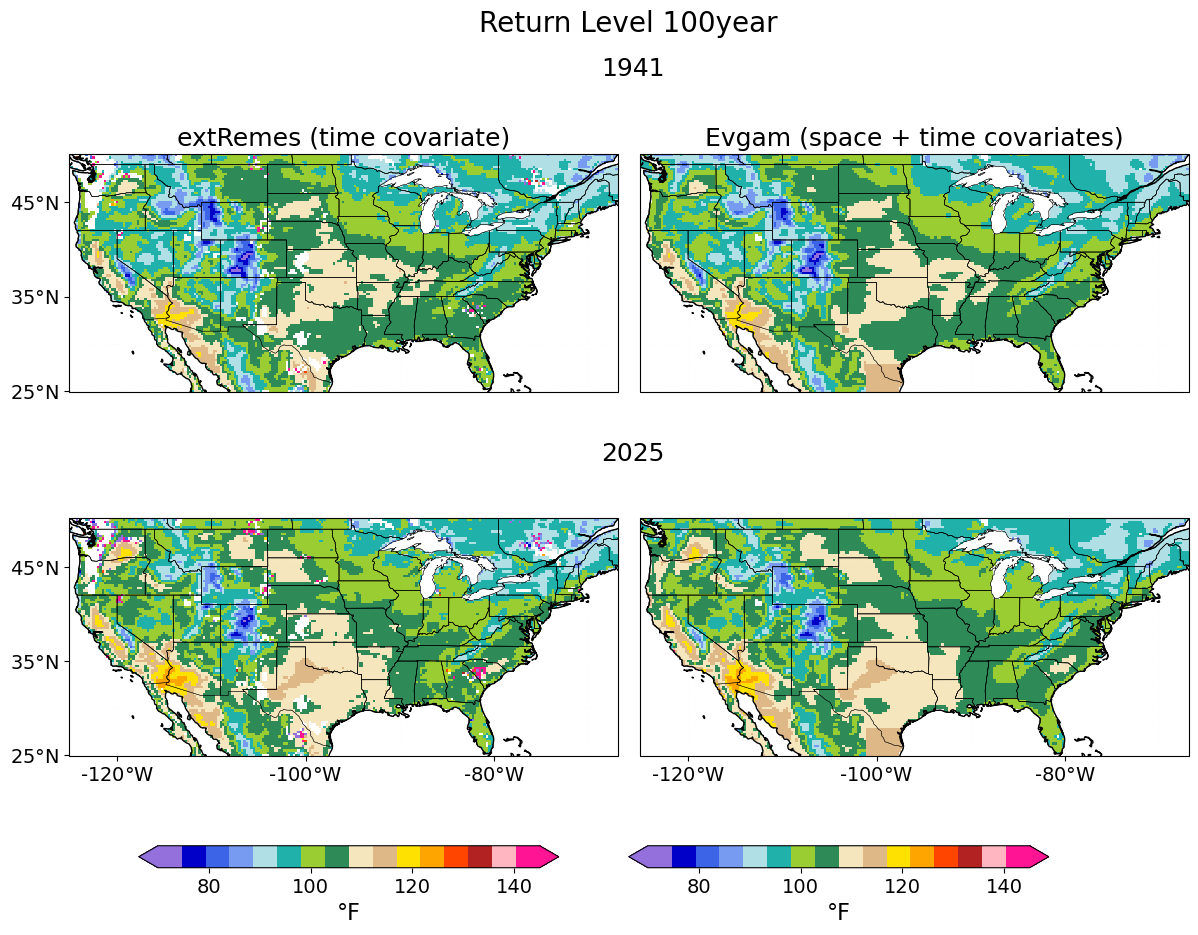

In [8]:
clevs = np.arange(70,150,5)
cmap = plt.get_cmap(cmaps.amwg,len(clevs)).copy()
#cmap.set_extremes(under='dimgrey', over='orange')

proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
cc1 = Trl100[0].sel(time=yearb).plot.pcolormesh(ax=ax[0],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
Trl100[1].sel(time=yearb).plot.pcolormesh(ax=ax[1],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
Trl100[0].sel(time=yeare).plot.pcolormesh(ax=ax[2],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
cc2 = Trl100[1].sel(time=yeare).plot.pcolormesh(ax=ax[3],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
fig.text(0.48,0.92,yearb,fontsize=18)
fig.text(0.48,0.57,yeare,fontsize=18)
####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 

for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.15, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
#
ax_cbar = fig.add_axes([0.5, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
#
plt.suptitle(f'Return Level 100year',fontsize=20)  

Text(0.5, 0.98, 'Return Level 100year Difference 2025 - 1941')

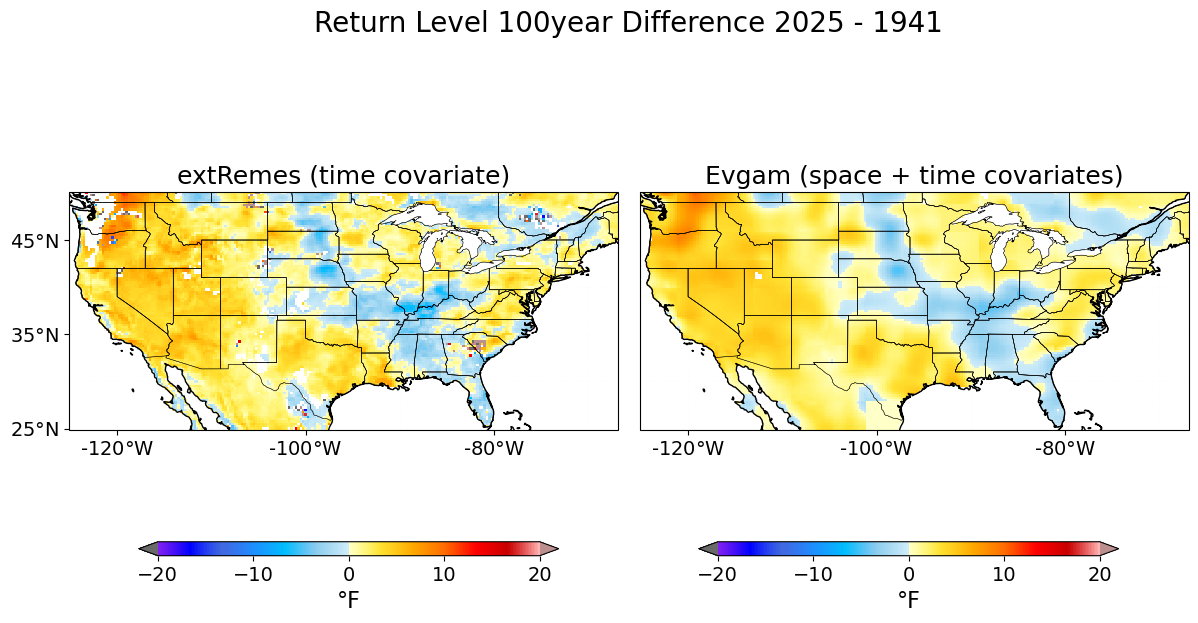

In [ ]:
clevs = np.arange(-20,21,1)
cmap = plt.get_cmap(cmaps.ncl_default,len(clevs)).copy()

proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
ix=0
cc1 = (Trl100[ix].sel(time=yeare)-Trl100[ix].sel(time=yearb)).plot.pcolormesh(ax=ax[ix],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
ix=1
cc2 = (Trl100[ix].sel(time=yeare)-Trl100[ix].sel(time=yearb)).plot.pcolormesh(ax=ax[ix],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)

####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    


for ix in range(0,1,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
#
ax_cbar = fig.add_axes([0.15, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
#
ax_cbar = fig.add_axes([0.55, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
plt.suptitle(f'Return Level 100year Difference {yeare} - {yearb}',fontsize=20)  

Text(0.5, 0.98, 'Location parameter')

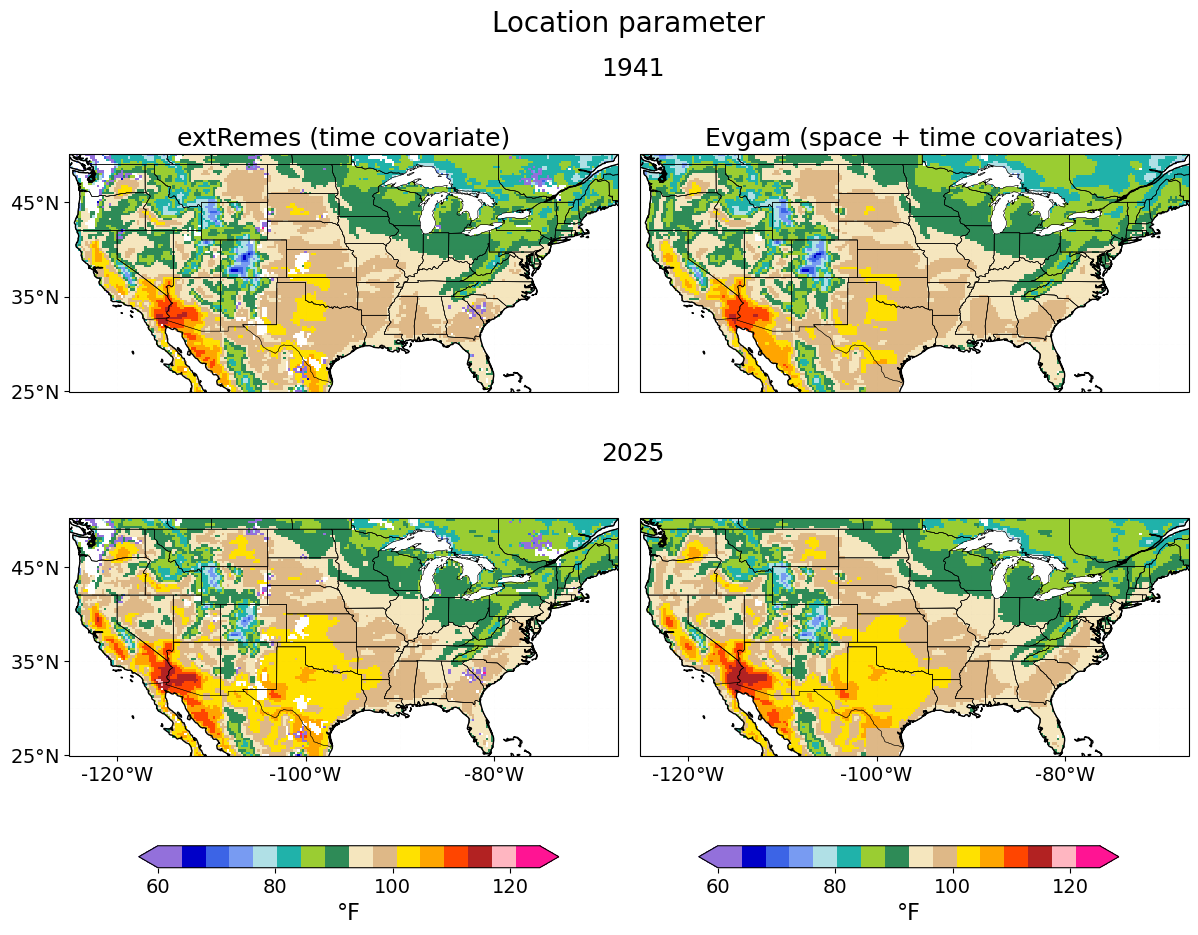

In [9]:
clevs = np.arange(60,130,5)
cmap = plt.get_cmap(cmaps.amwg,len(clevs)).copy()
#cmap.set_extremes(under='plum', over='magenta')

proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
cc1 = Tloc[0].sel(time=yearb).plot.pcolormesh(ax=ax[0],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
Tloc[1].sel(time=yearb).plot.pcolormesh(ax=ax[1],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
Tloc[0].sel(time=yeare).plot.pcolormesh(ax=ax[2],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
cc2 = Tloc[1].sel(time=yeare).plot.pcolormesh(ax=ax[3],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
fig.text(0.48,0.92,yearb,fontsize=18)
fig.text(0.48,0.57,yeare,fontsize=18)
  ####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 

for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
#
ax_cbar = fig.add_axes([0.15, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
#
ax_cbar = fig.add_axes([0.55, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
#
plt.suptitle(f'Location parameter',fontsize=20)  

Text(0.5, 0.98, 'Scale parameter')

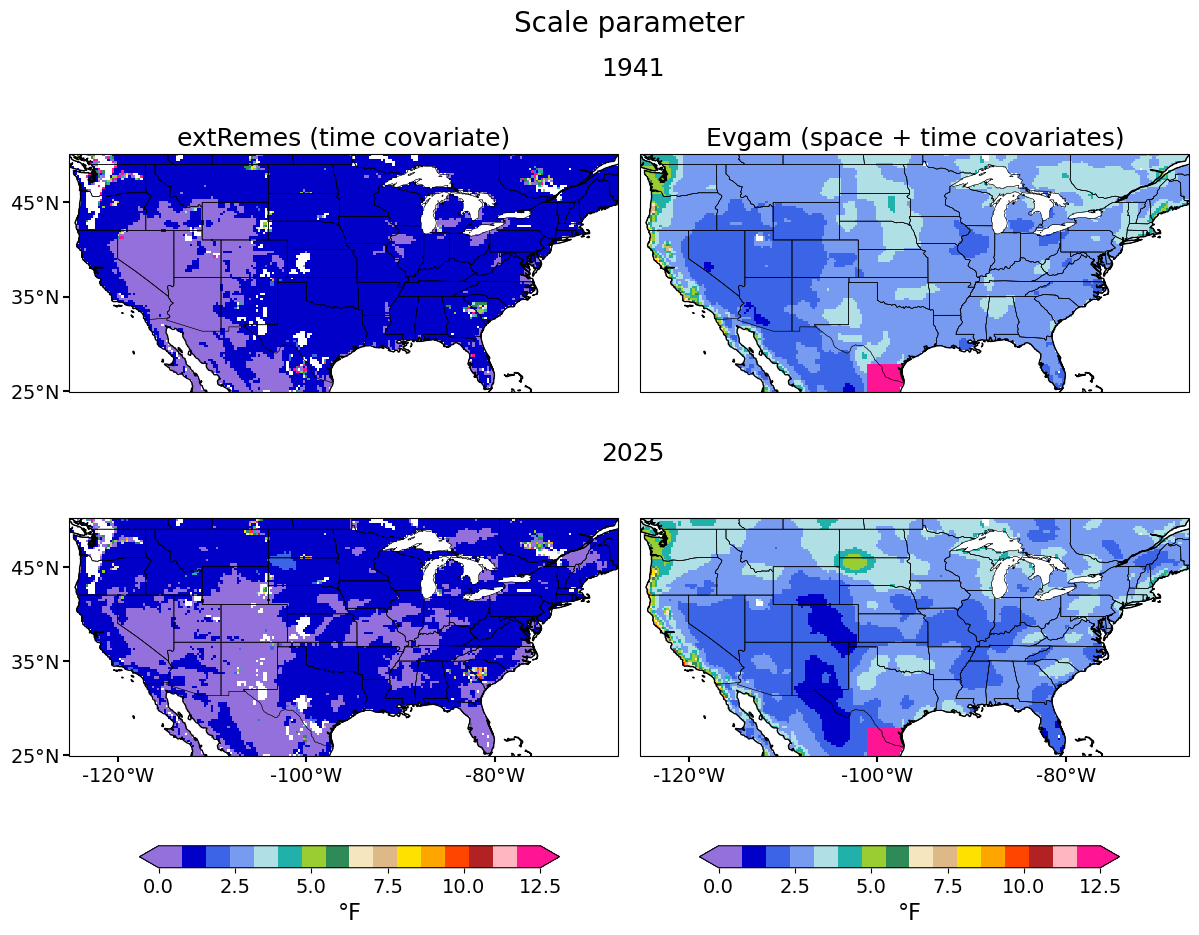

In [ ]:
clevs = np.arange(0,13,.5)
cmap = plt.get_cmap(cmaps.amwg,len(clevs)).copy()


proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
cc1 = Tscale[0].sel(time=yearb).plot.pcolormesh(ax=ax[0],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
Tscale[1].sel(time=yearb).plot.pcolormesh(ax=ax[1],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
Tscale[0].sel(time=yeare).plot.pcolormesh(ax=ax[2],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
cc2 = Tscale[1].sel(time=yeare).plot.pcolormesh(ax=ax[3],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
fig.text(0.48,0.92,yearb,fontsize=18)
fig.text(0.48,0.57,yeare,fontsize=18)
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
#
ax_cbar = fig.add_axes([0.15, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label='',fontsize=16)
#
ax_cbar = fig.add_axes([0.55, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label='',fontsize=16)
#
plt.suptitle(f'Scale parameter',fontsize=20)  

Text(0.5, 0.98, 'Shape parameter, year=1941')

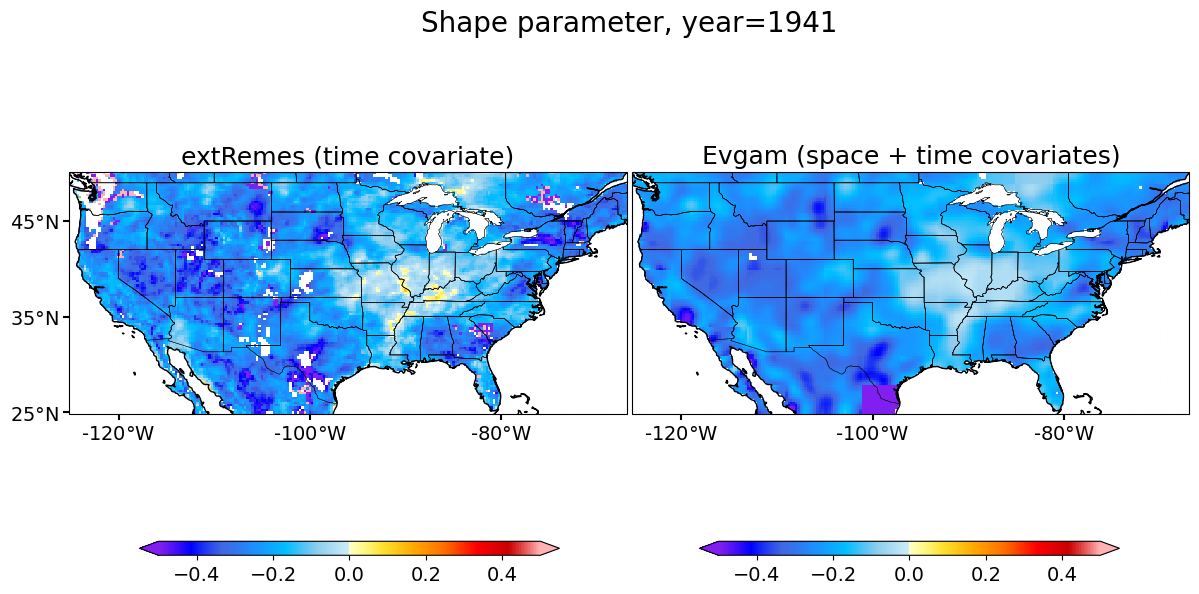

In [21]:
clevs = np.arange(-0.5,0.55,0.05)
cmap = plt.get_cmap(cmaps.ncl_default,len(clevs)).copy()

proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
ix=0
cc1 = Tshape[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
ix=1
cc2 = Tshape[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)

####
for ix in range(0,2):
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

for ix in range(0,1): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#

#
ax_cbar = fig.add_axes([0.15, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc1,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label='',fontsize=16)
#
ax_cbar = fig.add_axes([0.55, 0.2, 0.3, 0.02])
cbar=fig.colorbar(cc2,cax=ax_cbar,shrink=0.5,orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label='',fontsize=16)
#
plt.suptitle(f'Shape parameter, year={yearb}',fontsize=20)  

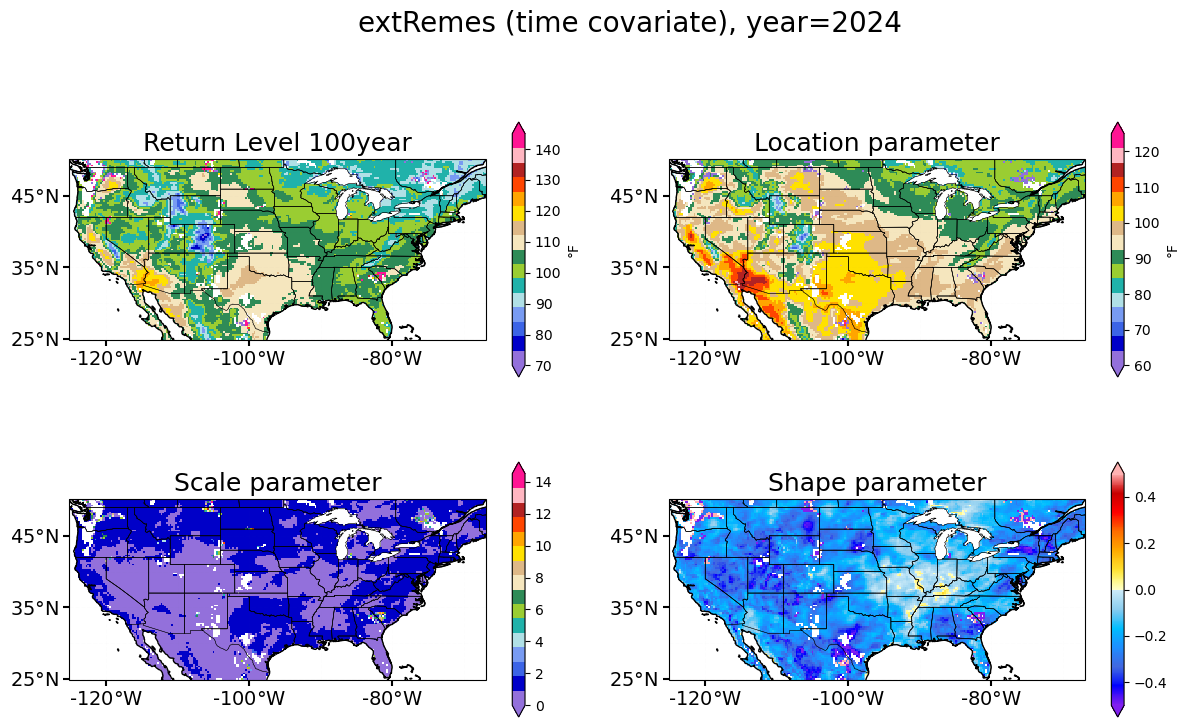

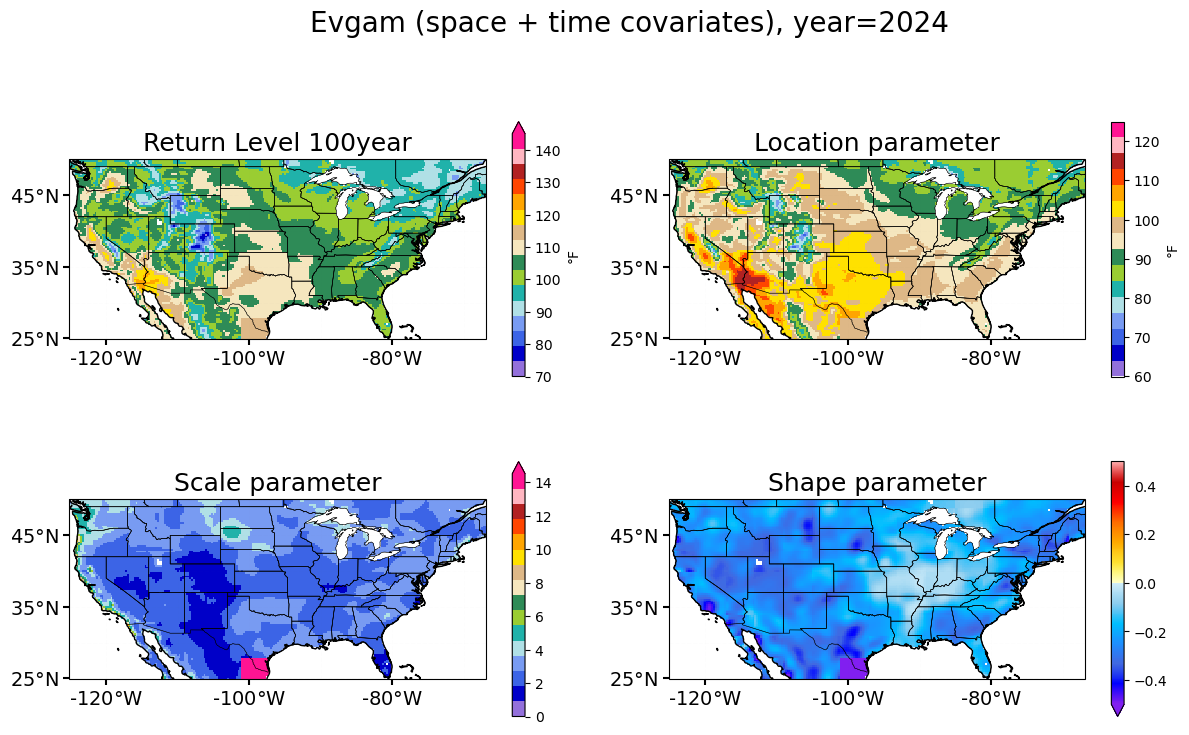

In [24]:
Tyears = [2024]
it = 1
proj=ccrs.PlateCarree()
for it in range(0,2):
 for iyear in Tyears:

  fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
  plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1, right=0.9,wspace=0.15,hspace=-0.2)
  ax = ax.flatten()
  clevs = np.arange(70,150,5)
  Trl100[it].sel(time=iyear).plot.pcolormesh(ax=ax[0],cmap=cmaps.amwg,vmin=clevs[0],vmax=clevs[-1],cbar_kwargs={'label':units,'shrink':0.6})
  ax[0].set_title(f'Return Level 100year',fontsize=18)  
  clevs = np.arange(60,130,5)
  Tloc[it].sel(time=iyear).plot.pcolormesh(ax=ax[1],cmap=cmaps.amwg,vmin=clevs[0],vmax=clevs[-1],cbar_kwargs={'label':units,'shrink':0.6})
  ax[1].set_title(f'Location parameter',fontsize=18)  
  clevs = np.arange(0,15,.5)
  Tscale[it].sel(time=iyear).plot.pcolormesh(ax=ax[2],cmap=cmaps.amwg,vmin=clevs[0],vmax=clevs[-1],cbar_kwargs={'label':'','shrink':0.6})
  ax[2].set_title(f'Scale parameter',fontsize=18)  
  clevs = np.arange(-0.5,0.55,0.05)
  Tshape[it].sel(time=iyear).plot.pcolormesh(ax=ax[3],cmap=cmaps.ncl_default,vmin=clevs[0],vmax=clevs[-1],cbar_kwargs={'label':'','shrink':0.6})
  ax[3].set_title(f'Shape parameter',fontsize=18)  
  ####
  for ix in range(0,4): 
    grd = ax[ix].gridlines(
        draw_labels=False, 
        color='gray', alpha=0.01, linestyle='--')

    ax[ix].set_xlabel('')
    ax[ix].set_ylabel('')
    ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
    ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
    ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
    ax[ix].coastlines()
  #
  plt.suptitle(f'{Tlabels[it]}, year={iyear}',fontsize=20)  
  plt.show()